# Seasonality in Mn from a variety of datasets

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime
import calendar

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### St. Lawrence River, 1990:

Data source: Cossa, D., G. H. Tremblay, and C. Gobeil. "Seasonality in iron and manganese concentrations of the St. Lawrence River." Science of the Total Environment 97 (1990): 185-190. 

https://www.sciencedirect.com/science/article/pii/004896979090239Q

Data collected between Autumn 1982 and Spring 1985.

In [2]:
# Load data:
def read_csv(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    data = csv.reader(ifile)
    
    year = []
    month = []
    value = []
   
    i = 0
    for row in data:
        i += 1
        if i < 2:
            i == 1
        else:
            year.append(str(row[0]))
            month.append(str(row[1]))
            value.append(float(row[2]))
    return year, month, value

f1 = '/ocean/brogalla/GEOTRACES/data/rivers/discharge_quebec.csv'
f2 = '/ocean/brogalla/GEOTRACES/data/rivers/dissolv_mn_quebec.csv'
f3 = '/ocean/brogalla/GEOTRACES/data/rivers/part_mn_quebec.csv'

y1, m1, discharge = read_csv(f1)
y2, m2, mn_dis = read_csv(f2) 
y3, m3, mn_part = read_csv(f3)

In [3]:
def add_days(y,m):
    date_name = []
    d = 1
    for i in range(0,len(m)):
        if i > 0:
            if m[i] == m[i-1]:
                d = d + 7
            else:
                d = 1
        date_name.append(y[i]+'-'+m[i]+'-'+str(d))
    
    return date_name

In [4]:
date_name1 = add_days(y1,m1)
date_name2 = add_days(y2,m2)
date_name3 = add_days(y3,m3)

In [5]:
# Create datetime object:
# Convert date
def convert_date(date):
    date_obj = []
    j = 0
    for i in date:
        j+=1
        conv = datetime.datetime.strptime(i, '%Y-%m-%d')
        date_obj.append(conv)
        
    return date_obj

In [6]:
date_obj1 = convert_date(date_name1)
date_obj2 = convert_date(date_name2)
date_obj3 = convert_date(date_name3)

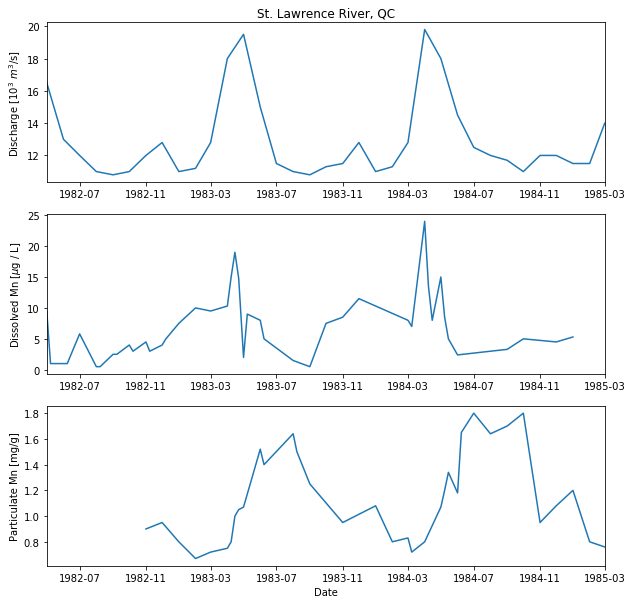

In [7]:
# Plot data:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((3, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((3, 1), (1, 0)) # dissolved mn
ax3 = plt.subplot2grid((3, 1), (2, 0)) # particulate mn

ax1.plot(date_obj1,discharge)
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('St. Lawrence River, QC')
ax1.set_xlim(date_obj2[0], date_obj3[-1])

ax2.plot(date_obj2,mn_dis)
ax2.set_ylabel(r'Dissolved Mn [$\mu$g / L]')
ax2.set_xlim(date_obj2[0], date_obj3[-1])

ax3.plot(date_obj3,mn_part)
ax3.set_xlabel('Date')
ax3.set_ylabel('Particulate Mn [mg/g]')
ax3.set_xlim(date_obj2[0], date_obj3[-1])
fig.savefig('stlawrence_1982-95.png', bbox_inches='tight')

It looks like there is a slight delay in the increase of Mn after high discharge period, this means that a direct correlation between discharge and concentration may not tell me anything.

SPM data from: 
Pocklington, Roger, and Francis C. Tan. "Seasonal and annual variations in the organic matter contributed by the St Lawrence River to the Gulf of St. Lawrence." Geochimica et Cosmochimica Acta 51.9 (1987): 2579-2586.

https://ac.els-cdn.com/0016703787903085/1-s2.0-0016703787903085-main.pdf?_tid=1db696d5-2875-4835-a3e1-00147d1b50ad&acdnat=1520534534_47e5c8602c9ba6abfd9ecc55da87ab59

In [8]:
dates_SPM = ['1982-1','1982-2','1982-3','1982-5', '1982-6', '1982-7', \
         '1982-8', '1982-9', '1982-10', '1982-11', '1982-12', \
         '1983-1','1983-2','1983-3','1983-4','1983-5', '1983-6', '1983-7', \
         '1983-8', '1983-9', '1983-10', '1983-11', \
         '1984-1','1984-2','1984-3','1984-4','1984-5', '1984-6', '1984-7', \
         '1984-8', '1984-9', '1984-10', '1984-11', '1984-12']
SPM = [7.11, 6.76, 4.91, 6.05, 4.51, 4.98, 5.73, 7.28, 8.85, 10.79, 9.80, \
       6.00, 9.75, 11.90, 23.85, 18.21, 17.02, 5.65, 11.48, 9.41, 8.94, 31.50, \
       7.31, 8.98, 12.16, 21.92, 12.57, 19.99, 6.68, 9.59, 5.00, 11.88, 21.84, 8.43]

In [9]:
# Create datetime object:
# Convert date
def convert_datespm(date):
    date_obj = []
    j = 0
    for i in date:
        j+=1
        conv = datetime.datetime.strptime(i, '%Y-%m')
        date_obj.append(conv)
        
    return date_obj

In [10]:
date_spm = convert_datespm(dates_SPM)

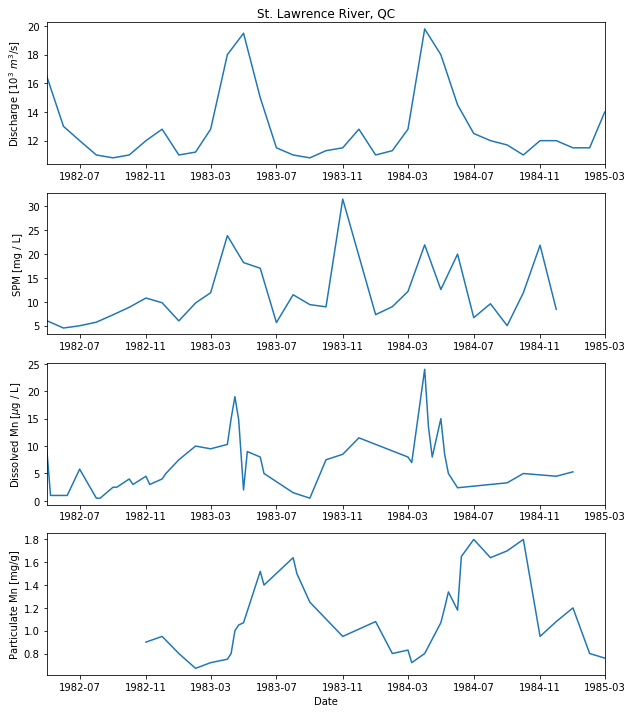

In [12]:
# Plot data:
fig = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((4, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((4, 1), (1, 0)) # SPM
ax3 = plt.subplot2grid((4, 1), (2, 0)) # dissolved mn
ax4 = plt.subplot2grid((4, 1), (3, 0)) # particulate mn

ax1.plot(date_obj1,discharge)
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('St. Lawrence River, QC')
ax1.set_xlim(date_obj2[0], date_obj3[-1])

ax2.plot(date_spm,SPM)
ax2.set_ylabel(r'SPM [mg / L]')
ax2.set_xlim(date_obj2[0], date_obj3[-1])

ax3.plot(date_obj2,mn_dis)
ax3.set_ylabel(r'Dissolved Mn [$\mu$g / L]')
ax3.set_xlim(date_obj2[0], date_obj3[-1])

ax4.plot(date_obj3,mn_part)
ax4.set_xlabel('Date')
ax4.set_ylabel('Particulate Mn [mg/g]')
ax4.set_xlim(date_obj2[0], date_obj3[-1])
fig.savefig('stlawrence_1982-95.png', bbox_inches='tight')

Create discharge, concentration relation. Interpolate values.

In [13]:
def toTimestamp(d):
    return calendar.timegm(d.timetuple())

interp_dates = np.array([date_obj2[0] + datetime.timedelta(weeks=i) for i in range(149)])

In [14]:
def interp_date(date_obj, value):
    arr1 = np.array([toTimestamp(date_obj[i]) for i in range(0,len(date_obj))]) 
    arr2 = value
    
    interp_dates = np.array([date_obj2[0] + datetime.timedelta(weeks=i) for i in range(149)])
    results = []
    
    for i in range(0,len(interp_dates)):
        result = np.interp(toTimestamp(interp_dates[i]),arr1,arr2)
        results.append(result)
        
    return results

In [15]:
int_discharge = interp_date(date_obj1, discharge)
int_mn_dis = interp_date(date_obj2, mn_dis)
int_mn_part = interp_date(date_obj3, mn_part)

Weekly interpolated values and measured values plotted on top of each other.

(723666.0, 724701.0)

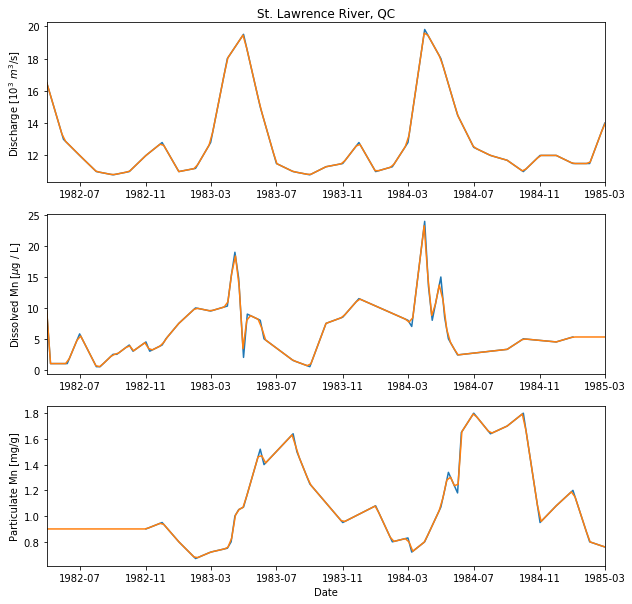

In [27]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((3, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((3, 1), (1, 0)) # dissolved mn
ax3 = plt.subplot2grid((3, 1), (2, 0)) # particulate mn

ax1.plot(date_obj1,discharge)
ax1.plot(interp_dates,int_discharge)
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('St. Lawrence River, QC')
ax1.set_xlim(date_obj2[0], date_obj3[-1])

ax2.plot(date_obj2,mn_dis)
ax2.plot(interp_dates,int_mn_dis)
ax2.set_ylabel(r'Dissolved Mn [$\mu$g / L]')
ax2.set_xlim(date_obj2[0], date_obj3[-1])

ax3.plot(date_obj3,mn_part)
ax3.plot(interp_dates,int_mn_part)
ax3.set_xlabel('Date')
ax3.set_ylabel('Particulate Mn [mg/g]')
ax3.set_xlim(date_obj2[0], date_obj3[-1])

### Discharge, concentration relationship:

In [28]:
print(date_obj1[-3])
print(date_obj2[-1])
print(interp_dates[-9])

1985-01-01 00:00:00
1985-01-01 00:00:00
1985-01-05 00:00:00


In [29]:
print(date_obj1[6])
print(date_obj3[0])
print(interp_dates[26])

1982-11-01 00:00:00
1982-11-01 00:00:00
1982-10-30 00:00:00


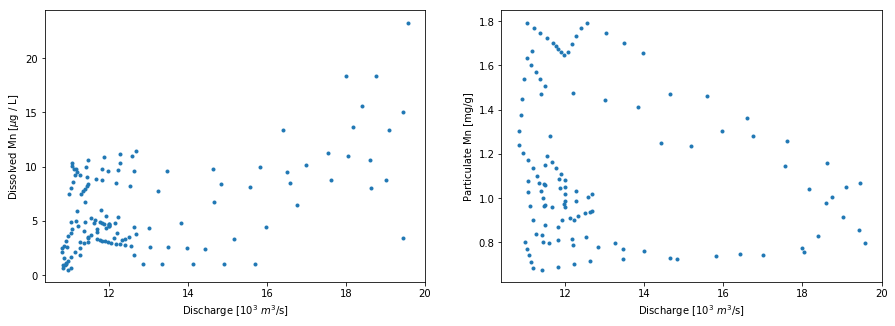

In [30]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 2), (0, 0)) # discharge
ax2 = plt.subplot2grid((1, 2), (0, 1)) # dissolved mn

ax1.plot(int_discharge[0:140], int_mn_dis[0:140], '.')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel(r'Dissolved Mn [$\mu$g / L]')

ax2.plot(int_discharge[26:149], int_mn_part[26:149], '.')
ax2.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax2.set_ylabel('Particulate Mn [mg/g]')
# ax2.set_xlim(0,20)

In [31]:
print(interp_dates[0])
print(interp_dates[9])

1982-05-01 00:00:00
1982-07-03 00:00:00


Add time shift of about two months for particulate concentrations:

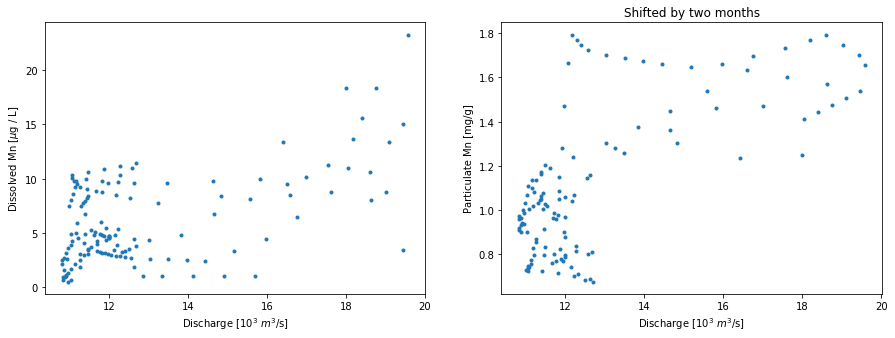

In [32]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 2), (0, 0)) # discharge
ax2 = plt.subplot2grid((1, 2), (0, 1)) # dissolved mn

ax1.plot(int_discharge[0:140], int_mn_dis[0:140], '.')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel(r'Dissolved Mn [$\mu$g / L]')

ax2.set_title('Shifted by two months')
ax2.plot(int_discharge[26-10:149-10], int_mn_part[26:149], '.')
ax2.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax2.set_ylabel('Particulate Mn [mg/g]')

# Additional data:

Ottawa & Upper Saint Lawrence river:
https://ac.els-cdn.com/S0883292705000752/1-s2.0-S0883292705000752-main.pdf?_tid=63aba33a-0538-11e8-8546-00000aab0f01&acdnat=1517260218_698206dea08cb16d823a73f709bda3bd

Rondeau, Bernard, et al. "Hydrological and biogeochemical dynamics of the minor and trace elements in the St. Lawrence River." Applied Geochemistry 20.7 (2005): 1391-1408.

<img src="files/bondeau.png">
<img src="files/rondeau.png">

In [33]:
ow_dates = ['1995-3', '1995-5', '1995-6','1995-8','1995-9','1995-10','1995-12', '1996-2', \
            '1996-3', '1996-4', '1996-5','1996-6', '1996-9']
ow_discharge = [3, 2.2, 3.4, 0.9, 0.8, 1.1, 2, 2.3, 1.9, 2, 5.8, 1.8, 1.2]
ow_mn_dis = [200, 140, 150, 20, 50, 35, 160, 140, 160, 150, 270, 80, 35]
ow_mn_part = [50, 100, 260, 180, 200, 70, 140, 75, 50, 60, 100, 150, 200]

In [34]:
lw_dates = ['1995-4','1995-5','1995-6','1995-7','1995-8','1995-9', '1995-10',\
            '1995-11','1995-12', '1996-1','1996-3', '1996-5','1996-7', '1996-8','1996-9']
lw_discharge = [6.3, 6.3, 6.4, 6.4, 6.4, 6.5, 6.5, 7.1, 8,  6.1, 7.5, 7.75, 8.4, 8.2, 7.3]
lw_mn_dis = [14, 36, 60, 32, 44, 62, 30, 23, 13, 54, 13, 27, 38, 25, 23]
lw_mn_part = [14, 34, 45, 47, 40, 30, 32, 35, 18, 17, 13, 25, 40, 46, 48]

In [35]:
def convert_date(date):
    date_obj = []
    for i in date:
        conv = datetime.datetime.strptime(i, '%Y-%m')
        date_obj.append(conv)
    return date_obj

ow_dates = convert_date(ow_dates)
lw_dates = convert_date(lw_dates)

### Ottawa River:

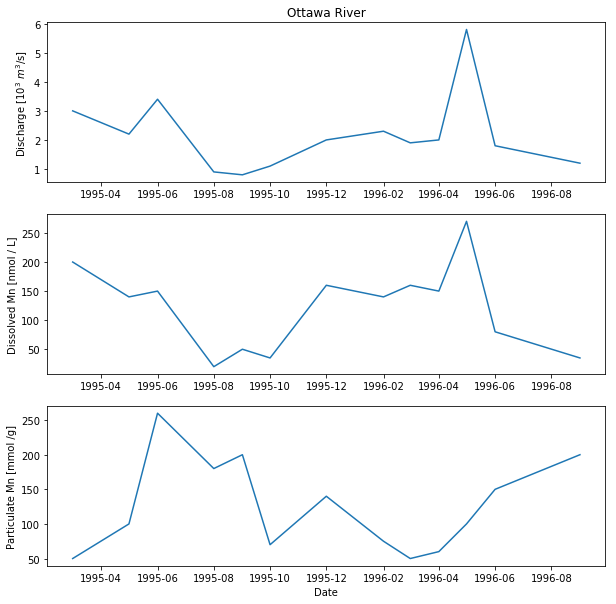

In [36]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((3, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((3, 1), (1, 0)) # dissolved mn
ax3 = plt.subplot2grid((3, 1), (2, 0)) # particulate mn

ax1.plot(ow_dates,ow_discharge)
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('Ottawa River')

ax2.plot(ow_dates,ow_mn_dis)
ax2.set_ylabel('Dissolved Mn [nmol / L]')

ax3.plot(ow_dates,ow_mn_part)
ax3.set_xlabel('Date')
ax3.set_ylabel('Particulate Mn [mmol /g]')

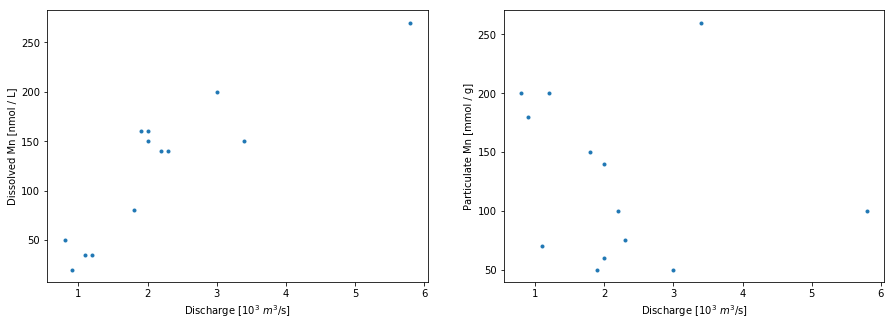

In [40]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 2), (0, 0)) # discharge
ax2 = plt.subplot2grid((1, 2), (0, 1)) # dissolved mn

ax1.plot(ow_discharge, ow_mn_dis, '.')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel('Dissolved Mn [nmol / L]')

ax2.plot(ow_discharge, ow_mn_part, '.')
ax2.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax2.set_ylabel('Particulate Mn [mmol / g]')

Add three month time shift to particulate Mn:

In [41]:
print(ow_dates[0])
print(ow_dates[1])

1995-03-01 00:00:00
1995-05-01 00:00:00


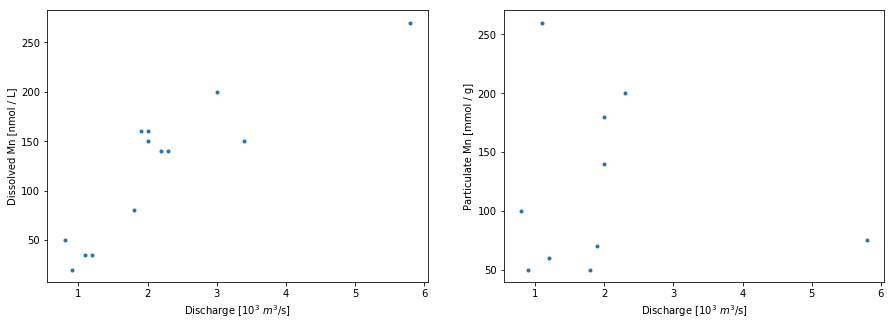

In [42]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 2), (0, 0)) # discharge
ax2 = plt.subplot2grid((1, 2), (0, 1)) # dissolved mn

ax1.plot(ow_discharge, ow_mn_dis, '.')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel('Dissolved Mn [nmol / L]')

ax2.plot(ow_discharge[0+3:13], ow_mn_part[0:13-3], '.')
ax2.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax2.set_ylabel('Particulate Mn [mmol / g]')

### Upper St. Lawrence River:

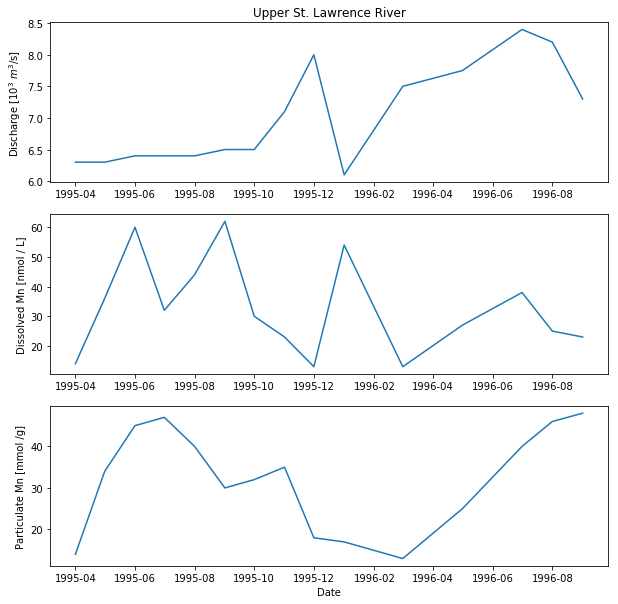

In [43]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((3, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((3, 1), (1, 0)) # dissolved mn
ax3 = plt.subplot2grid((3, 1), (2, 0)) # particulate mn

ax1.plot(lw_dates,lw_discharge)
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('Upper St. Lawrence River')

ax2.plot(lw_dates,lw_mn_dis)
ax2.set_ylabel('Dissolved Mn [nmol / L]')

ax3.plot(lw_dates,lw_mn_part)
ax3.set_xlabel('Date')
ax3.set_ylabel('Particulate Mn [mmol /g]')

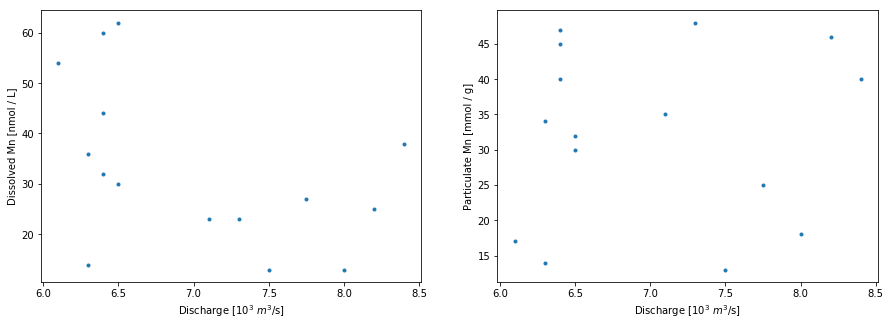

In [44]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 2), (0, 0)) # discharge
ax2 = plt.subplot2grid((1, 2), (0, 1)) # dissolved mn

ax1.plot(lw_discharge, lw_mn_dis, '.')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel('Dissolved Mn [nmol / L]')

ax2.plot(lw_discharge, lw_mn_part, '.')
ax2.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax2.set_ylabel('Particulate Mn [mmol / g]')

Do not consider upper st. Lawrence River, due to consistency in discharge due to sluices.

# Kalix River, Sweden:

Pontér, Christer, et al. "Temporal variations in dissolved and suspended iron and manganese in the Kalix River, northern Sweden." Chemical Geology 81.1-2 (1990): 121-131.

https://ac.els-cdn.com/0009254190900426/1-s2.0-0009254190900426-main.pdf?_tid=060afb1d-b9df-4c55-b707-a9075eb016b1&acdnat=1520535880_44d6d1305492963eea2c887aee166c85

Use Fe as a proxy for SPM. 

In [26]:
Q_dates = ['1982-5-3','1982-5-10','1982-5-17', '1982-5-20', '1982-5-24', '1982-5-30', \
          '1982-6-2', '1982-6-8', '1982-6-10', '1982-6-14', '1982-6-20', '1982-6-22', \
          '1982-6-28', '1982-6-30', '1982-7-5', '1982-7-10', '1982-7-12', '1982-7-20', \
          '1982-7-22', '1982-7-29', '1982-7-30', '1982-8-5', '1982-8-10', '1982-8-12', \
          '1982-8-19', '1982-8-20', '1982-8-30', '1982-8-31', '1982-9-10', '1982-9-20', \
          '1982-9-27', '1982-9-30']
Q = [200, 450, 1300, 1250, 730, 800, 810, 1100, 975, 900, 350, 280, 275, 280, \
    315, 500, 700, 450, 420, 400, 380, 300, 280, 275, 330, 335, 385, 380, 440, \
    360, 475, 420] #m3/s
K_dates = ['1982-5-3', '1982-5-10', '1982-5-17', '1982-5-24', '1982-6-2', '1982-6-8', \
        '1982-6-14', '1982-6-22', '1982-6-28', '1982-7-5', '1982-7-12', '1982-7-22', \
        '1982-7-29', '1982-8-5', '1982-8-12', '1982-8-19', '1982-8-31', '1982-9-27']
K_pMn = [7, 16, 13, 9, 14, 3, 4, 5.5, 3.8, 12, 15, 18.5, 14, 19, 13, 11, 10, 8] # microg/L
K_dMn = [53, 26, 16, 14, 12, 11, 10.5, 12.6, 13, 4.3, 2.8, 1.8, 4, 3.8, 4, 2, 4, 6]
K_pFe = [230, 360, 135, 155, 160, 35, 45, 50, 45, 45, 30, 32, 32, 20, 30, 29, 45, 80]

In [28]:
Q_date = convert_date(Q_dates)
K_date = convert_date(K_dates)

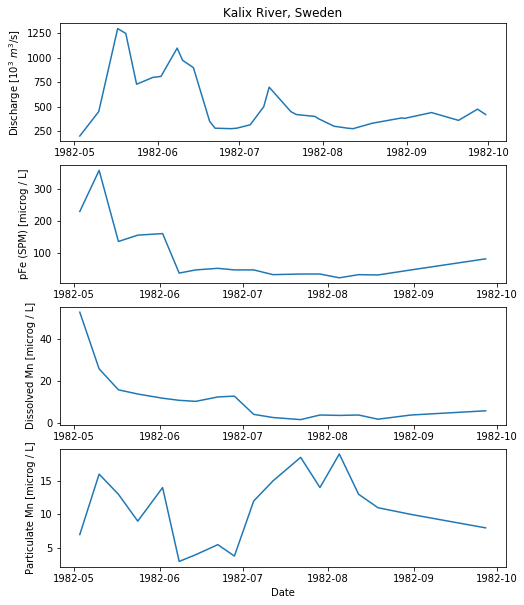

In [31]:
fig = plt.figure(figsize=(8,10))
ax1 = plt.subplot2grid((4, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((4, 1), (1, 0)) # dissolved mn
ax3 = plt.subplot2grid((4, 1), (2, 0)) # particulate mn
ax4 = plt.subplot2grid((4, 1), (3, 0)) # particulate mn

ax1.plot(Q_date,Q)
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('Kalix River, Sweden')

ax2.plot(K_date, K_pFe)
ax2.set_ylabel('pFe (SPM) [microg / L]')

ax3.plot(K_date, K_dMn)
ax3.set_ylabel('Dissolved Mn [microg / L]')

ax4.plot(K_date, K_pMn)
ax4.set_xlabel('Date')
ax4.set_ylabel('Particulate Mn [microg / L]')

Pontér, Christer, Johan Ingri, and Kurt Boström. "Geochemistry of manganese in the Kalix River, northern Sweden." Geochimica et Cosmochimica Acta 56.4 (1992): 1485-1494.

https://www.sciencedirect.com/science/article/pii/0016703792902188?_rdoc=1&_fmt=high&_origin=gateway&_docanchor=&md5=b8429449ccfc9c30159a5f9aeaa92ffb

<img src="files/kalix_q.png">
<img src="files/kalix_mn.png">

### River Severn - England

Neal, C., et al. "The hydrochemistry of the headwaters of the River Severn, Plynlimon." Hydrology and Earth System Sciences 1.3 (1997): 583-617.

https://www.hydrol-earth-syst-sci.net/1/583/1997/hess-1-583-1997.pdf

<img src="files/severn.png">

# Combining all the random data sets:

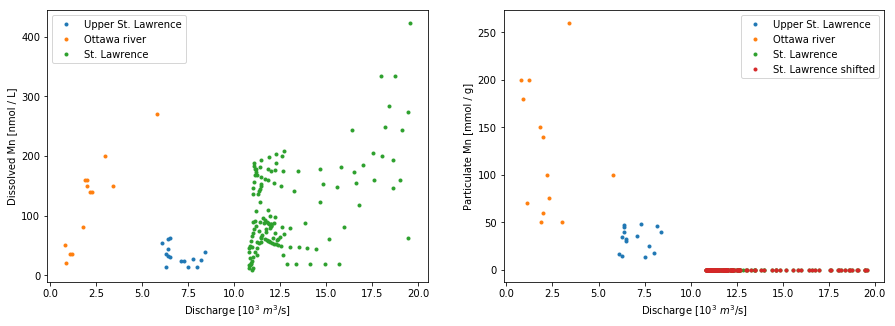

In [45]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 2), (0, 0)) # discharge
ax2 = plt.subplot2grid((1, 2), (0, 1)) # dissolved mn

ax1.plot(lw_discharge, lw_mn_dis, '.', label= 'Upper St. Lawrence')
ax1.plot(ow_discharge, ow_mn_dis, '.', label='Ottawa river')
ax1.plot(int_discharge[0:140], [i*18.2023 for i in int_mn_dis[0:140]], '.', label='St. Lawrence')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel('Dissolved Mn [nmol / L]')
ax1.legend()

ax2.plot(lw_discharge, lw_mn_part, '.', label= 'Upper St. Lawrence')
ax2.plot(ow_discharge, ow_mn_part, '.', label= 'Ottawa river')
ax2.plot(int_discharge[26:149], [i*0.0182023 for i in int_mn_part[26:149]], '.', label='St. Lawrence')
ax2.plot(int_discharge[26-10:149-10], [i*0.0182023 for i in int_mn_part[26:149]], '.', label='St. Lawrence shifted')
ax2.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax2.set_ylabel('Particulate Mn [mmol / g]')
ax2.legend()

# AGRO dataset: Arctic Rivers

<img src="files/watershedmap.jpg">

http://www.arcticgreatrivers.org/images/watershedmap.jpg

In [46]:
# Load data:
def read_AGRO(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    data = csv.reader(ifile)
    
    station = []
    date = []
    Mn = []
   
    i = 0
    for row in data:
        i += 1
        if i < 2:
            i == 1
        else:
            station.append(str(row[0]))
            date.append(str(row[1]))
            Mn.append(float(row[2]))
    return station, date, Mn

f1 = '/ocean/brogalla/GEOTRACES/data/rivers/AGRO_river_tracers.csv'

stat, dates, Mn = read_AGRO(f1)

In [47]:
# Load data:
def read_AGROQ(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    data = csv.reader(ifile)
    
    date = []
    yukon = []
    mackenzie = []
    lena = []
    ob = []
    yenisey = []
    kolyma = []

    i = 0
    for row in data:
        i += 1
        if i <= 3:
            i == 2
        else:
            date.append(str(row[0]))
            yukon.append(float(row[1].replace(',','')))
            mackenzie.append(float(row[2].replace(',','')))
            lena.append(float(row[3].replace(',','')))
            ob.append(float(row[4].replace(',','')))
#            yenisey.append(float(row[5].replace(',','')))
            kolyma.append(float(row[6].replace(',','')))
    return date, yukon, mackenzie, lena, ob, yenisey, kolyma

f1 = '/ocean/brogalla/GEOTRACES/data/rivers/AGRO_river_discharge.csv'

date_Q, yukon, mackenzie, lena, ob, yenisey, kolyma = read_AGROQ(f1)

In [48]:
def convert_date(date):
    date_obj = []
    j = 0
    for i in date:
        j+=1
        conv = datetime.datetime.strptime(i, '%Y-%m-%d')
        date_obj.append(conv)
        
    return date_obj

In [49]:
dates_Q = convert_date(date_Q[::-1])
yukon = yukon[::-1]
mackenzie = mackenzie[::-1]
lena = lena[::-1]
ob = ob[::-1]
yenisey = yenisey[::-1]
kolyma = kolyma[::-1]

In [50]:
def convert_date_AGRO(date):
    date_obj = []
    j = 0
    for i in date:
        j+=1
        conv = datetime.datetime.strptime(i, '%d-%b-%y')
        date_obj.append(conv)
        
    return date_obj

In [51]:
dates_kolyma = dates[0:8]
dates_kolyma = convert_date_AGRO(dates_kolyma)
Mn_kolyma = Mn[0:8]
dates_lena = dates[8:23]
dates_lena = convert_date_AGRO(dates_lena)
Mn_lena = Mn[8:23]
dates_mack = dates[23:37]
dates_mack = convert_date_AGRO(dates_mack)
Mn_mack = Mn[23:37]
dates_ob = dates[37:52]
dates_ob = convert_date_AGRO(dates_ob)
Mn_ob = Mn[37:52]
dates_yenisey = dates[52:65]
dates_yenisey = convert_date_AGRO(dates_yenisey)
Mn_yenisey = Mn[52:65]
dates_yukon = dates[65:80]
dates_yukon = convert_date_AGRO(dates_yukon)
Mn_yukon = Mn[65:80]

In [52]:
def toTimestamp(d):
    return calendar.timegm(d.timetuple())

Q_dates = np.array([dates_Q[0] + datetime.timedelta(weeks=i) for i in range(52*3)])

In [53]:
def interp_date(date_obj, value):
    arr1 = np.array([toTimestamp(date_obj[i]) for i in range(0,len(date_obj))]) 
    arr2 = value
    
    interp_dates = np.array([dates_Q[0] + datetime.timedelta(weeks=i) for i in range(52*3)])
    results = []
    
    for i in range(0,len(interp_dates)):
        result = np.interp(toTimestamp(interp_dates[i]),arr1,arr2)
        results.append(result)
        
    return results

In [54]:
Q_yukon = interp_date(dates_Q, yukon)
Q_mackenzie = interp_date(dates_Q, mackenzie)
Q_lena = interp_date(dates_Q, lena)
Q_ob = interp_date(dates_Q, ob)
Q_kolyma = interp_date(dates_Q, kolyma)

In [55]:
QMn_yukon = interp_date(dates_yukon, Mn_yukon)
QMn_mackenzie = interp_date(dates_mack, Mn_mack)
QMn_lena = interp_date(dates_lena, Mn_lena)
QMn_ob = interp_date(dates_ob, Mn_ob)
QMn_kolyma = interp_date(dates_kolyma, Mn_kolyma)

In [56]:
def normalize(value):
    norm_value = [(i-np.min(value))/(np.max(value)-np.min(value)) for i in value]
    return norm_value

(731580.0, 732266.0)

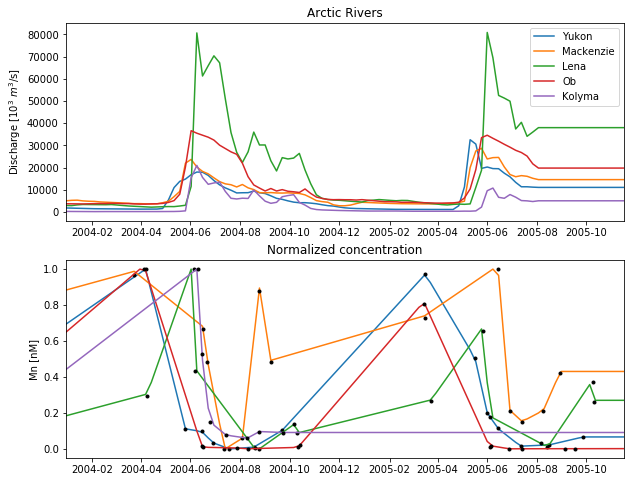

In [57]:
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot2grid((2, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((2, 1), (1, 0))

ax1.plot(Q_dates,Q_yukon,label='Yukon')
ax1.plot(Q_dates, Q_mackenzie, label='Mackenzie')
ax1.plot(Q_dates, Q_lena, label='Lena')
ax1.plot(Q_dates, Q_ob, label='Ob')
ax1.plot(Q_dates, Q_kolyma, label='Kolyma')
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('Arctic Rivers')
ax1.set_xlim(Q_dates[52], Q_dates[150])
ax1.legend()

ax2.plot(Q_dates, normalize(QMn_yukon),label='Yukon')
ax2.plot(dates_yukon, normalize(Mn_yukon),'.k' )
ax2.plot(Q_dates, normalize(QMn_mackenzie), label='Mackenzie')
ax2.plot(dates_mack, normalize(Mn_mack), '.k' )
ax2.plot(Q_dates, normalize(QMn_lena), label='Lena')
ax2.plot(dates_lena, normalize(Mn_lena), '.k' )
ax2.plot(Q_dates, normalize(QMn_ob), label='Ob')
ax2.plot(dates_ob, normalize(Mn_ob), '.k' )
ax2.plot(Q_dates, normalize(QMn_kolyma), label='Kolyma')
ax2.plot(dates_kolyma, normalize(Mn_kolyma), '.k' )
ax2.set_ylabel(r'Mn [nM]')
ax2.set_title('Normalized concentration')
ax2.set_xlim(Q_dates[52], Q_dates[150])

##### Date of ice break up:

Yukon: http://www.yukonriverbreakup.com/statistics

Mackenzie: Muhammad, P., C. Duguay, and K. K. Kang. "Monitoring ice break-up on the Mackenzie River using MODIS data." The Cryosphere 10.2 (2016): 569.

Lena: http://onlinelibrary.wiley.com/doi/10.1002/hyp.1146/epdf (estimate based on 1987) also: https://ac.els-cdn.com/S0921818105000615/1-s2.0-S0921818105000615-main.pdf?_tid=0c892d10-06bf-11e8-a456-00000aacb360&acdnat=1517428014_67f688b93e3869dcc42130b49f60a01d

Ob: http://www.tandfonline.com/doi/pdf/10.1080/02723646.2000.10642698?needAccess=true (from 1990s)

Kolyma: Mann, P. J., et al. "Controls on the composition and lability of dissolved organic matter in Siberia's Kolyma River basin." Journal of Geophysical Research: Biogeosciences 117.G1 (2012). http://onlinelibrary.wiley.com/doi/10.1029/2011JG001798/epdf (average for 1999-2010)

In [58]:
# Additional data set:
dates_lena_a = ['1996-05-21', '1996-05-25', '1996-05-28', '1996-05-29', '1996-05-31' \
        , '1996-06-02', '1996-06-04', '1996-06-07', '1996-06-09', '1996-06-12']
Mn_dis_lena = [84, 71, 171, 82, 233, 369, 142, 184, 313, 1471] # nM
Mn_par_lena = [15.4, 24.5, 14.5, 18.9, 22.5, 26.4, 16.0, 17.6, 17.3, 11.6] # micro mol / g 

dates_lena_add = convert_date(dates_lena_a)
#lat = [72 + 12/60]
#lon = [128 + 03.6/60]
#depth = [5, 1, 1, 1, 1, 1, 1, 1, 1, 1] # [m]
# Pb_dis_lena = [0.10, 0.29, 1.26, 0.19, 0.29, 0.19, 0.48, 1.06, 0.53, 2.22] # nM
# Pb_par_lena = [0.23, 0.36, 2.57, 0.29, 0.28, 0.42, 0.38, 0.27, 0.24, 0.24] # micro mol / g

In [59]:
ice_yukon = [datetime.datetime.strptime('2004-05-04', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-04-29','%Y-%m-%d')]
ice_mack = [datetime.datetime.strptime('2004-05-01', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-04-26','%Y-%m-%d')]
ice_lena = [datetime.datetime.strptime('2004-05-15', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-05-15','%Y-%m-%d')]
ice_ob = [datetime.datetime.strptime('2004-04-30', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-04-30','%Y-%m-%d')]
ice_kolyma = [datetime.datetime.strptime('2004-05-21', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-05-21','%Y-%m-%d')]

(-0.05, 1.05)

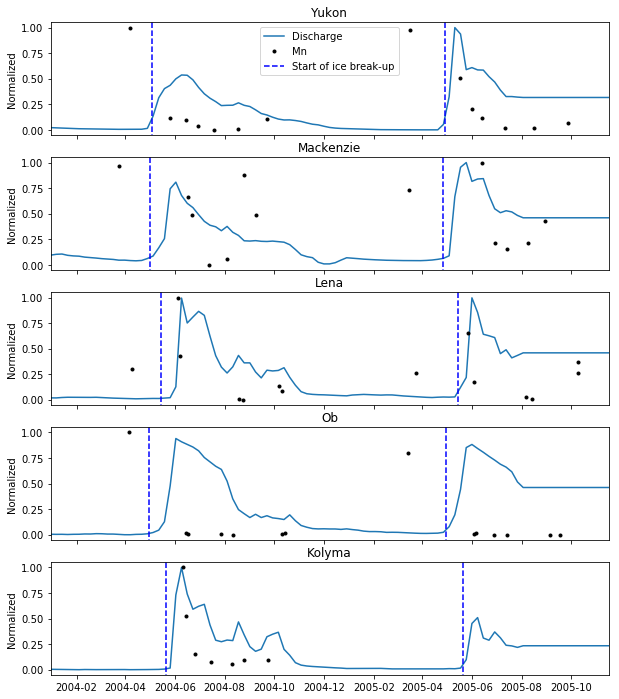

In [60]:
fig = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((5, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((5, 1), (1, 0))
ax3 = plt.subplot2grid((5, 1), (2, 0))
ax4 = plt.subplot2grid((5, 1), (3, 0))
ax5 = plt.subplot2grid((5, 1), (4, 0))

ax1.plot(Q_dates, normalize(Q_yukon), label='Discharge')
#ax1.plot(Q_dates, normalize(QMn_yukon), label='Mn')
ax1.plot(dates_yukon, normalize(Mn_yukon), '.k', label = 'Mn')
ax1.plot([ice_yukon[0],ice_yukon[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax1.plot([ice_yukon[1],ice_yukon[1]],[-0.1, 1.1],'--b')
ax1.set_ylabel('Normalized')
ax1.set_title('Yukon')
ax1.set_xlim(Q_dates[52], Q_dates[150])
ax1.set_xticklabels([])
ax1.set_ylim(-0.05,1.05)
ax1.legend()

ax2.plot(Q_dates, normalize(Q_mackenzie), label='Discharge')
#ax2.plot(Q_dates, normalize(QMn_mackenzie), label='Mn')
ax2.plot([ice_mack[0],ice_mack[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax2.plot([ice_mack[1],ice_mack[1]],[-0.1, 1.1],'--b')
ax2.plot(dates_mack, normalize(Mn_mack),'.k')
ax2.set_ylabel('Normalized')
ax2.set_title('Mackenzie')
ax2.set_xlim(Q_dates[52], Q_dates[150])
ax2.set_ylim(-0.05,1.05)
ax2.set_xticklabels([])
Update on progress in quantifying processes and setting up my model
--- talk about ice model a
Update on progress in quantifying processes and setting up my model
--- talk about ice model a

ax3.plot(Q_dates, normalize(Q_lena), label='Discharge')
# ax3.plot(Q_dates, normalize(QMn_lena), label='Mn')
ax3.plot(dates_lena, normalize(Mn_lena),'.k')
ax3.plot([ice_lena[0],ice_lena[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax3.plot([ice_lena[1],ice_lena[1]],[-0.1, 1.1],'--b')
ax3.set_ylabel('Normalized')
ax3.set_title('Lena')
ax3.set_xlim(Q_dates[52], Q_dates[150])
ax3.set_ylim(-0.05,1.05)
ax3.set_xticklabels([])

ax4.plot(Q_dates, normalize(Q_ob), label='Discharge')
# ax4.plot(Q_dates, normalize(QMn_ob), label='Mn')
ax4.plot(dates_ob, normalize(Mn_ob),'.k')
ax4.plot([ice_ob[0],ice_ob[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax4.plot([ice_ob[1],ice_ob[1]],[-0.1, 1.1],'--b')
ax4.set_ylabel('Normalized')
ax4.set_title('Ob')
ax4.set_xlim(Q_dates[52], Q_dates[150])
ax4.set_ylim(-0.05,1.05)
ax4.set_xticklabels([])

ax5.plot(Q_dates, normalize(Q_kolyma), label='Discharge')
# ax5.plot(Q_dates, normalize(QMn_kolyma), label='Mn')
ax5.plot(dates_kolyma, normalize(Mn_kolyma),'.k')
ax5.plot([ice_kolyma[0],ice_kolyma[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax5.plot([ice_kolyma[1],ice_kolyma[1]],[-0.1, 1.1],'--b')
ax5.set_ylabel('Normalized')
ax5.set_title('Kolyma')
ax5.set_xlim(Q_dates[52], Q_dates[150])
ax5.set_ylim(-0.05,1.05)

# fig.savefig('AGRO_rivers.png',bbox_inches='tight')

Additional data points for the Lena River from: https://ac.els-cdn.com/S0921818105000615/1-s2.0-S0921818105000615-main.pdf?_tid=0c892d10-06bf-11e8-a456-00000aacb360&acdnat=1517428014_67f688b93e3869dcc42130b49f60a01d

In [61]:
ax1.plot(Q_dates, normalize(Q_yukon), label='Discharge')
ax1.plot(dates_yukon, normalize(Mn_yukon), '.k', label = 'Mn')
ax1.plot([ice_yukon[0],ice_yukon[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax1.plot([ice_yukon[1],ice_yukon[1]],[-0.1, 1.1],'--b')

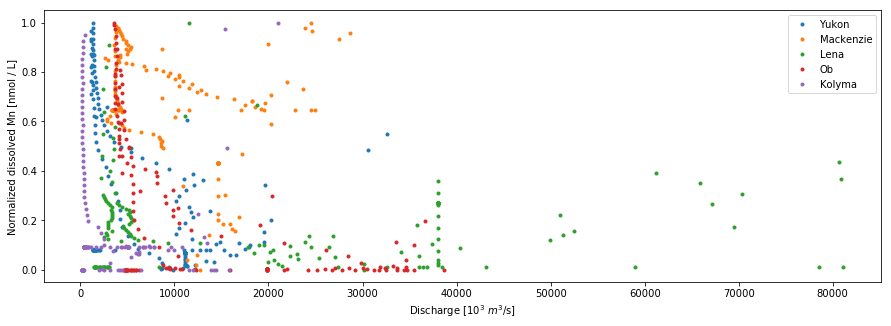

In [62]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 1), (0, 0)) 

ax1.plot(Q_yukon, normalize(QMn_yukon), '.', label= 'Yukon')
ax1.plot(Q_mackenzie, normalize(QMn_mackenzie), '.', label= 'Mackenzie')
ax1.plot(Q_lena, normalize(QMn_lena), '.', label= 'Lena')
ax1.plot(Q_ob, normalize(QMn_ob), '.', label= 'Ob')
ax1.plot(Q_kolyma, normalize(QMn_kolyma), '.', label= 'Kolyma')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel('Normalized dissolved Mn [nmol / L]')
ax1.legend()

Add time shift of three months to concentrations:

In [63]:
print(Q_dates[0])
print(Q_dates[15])
print(len(Q_lena))

2003-01-01 00:00:00
2003-04-16 00:00:00
156


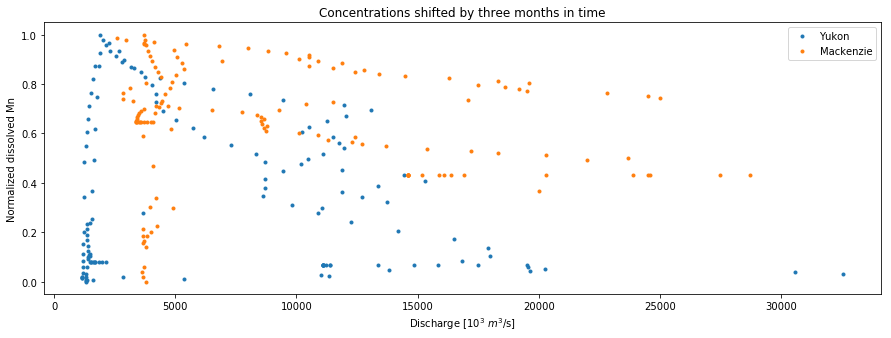

In [64]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 1), (0, 0)) 

shift = 15

ax1.plot(Q_yukon[0:156-shift], normalize(QMn_yukon[0+shift:156]), '.', label= 'Yukon')
ax1.plot(Q_mackenzie[0:156-shift], normalize(QMn_mackenzie[0+shift:156]), '.', label= 'Mackenzie')
# ax1.plot(Q_lena[0:156-shift], normalize(QMn_lena[0+shift:156]), '.', label= 'Lena')
# ax1.plot(Q_ob[0:156-shift], normalize(QMn_ob[0+shift:156]), '.', label= 'Ob')
# ax1.plot(Q_kolyma[0:156-shift], normalize(QMn_kolyma[0+shift:156]), '.', label= 'Kolyma')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel('Normalized dissolved Mn')
ax1.set_title('Concentrations shifted by three months in time')
ax1.legend()

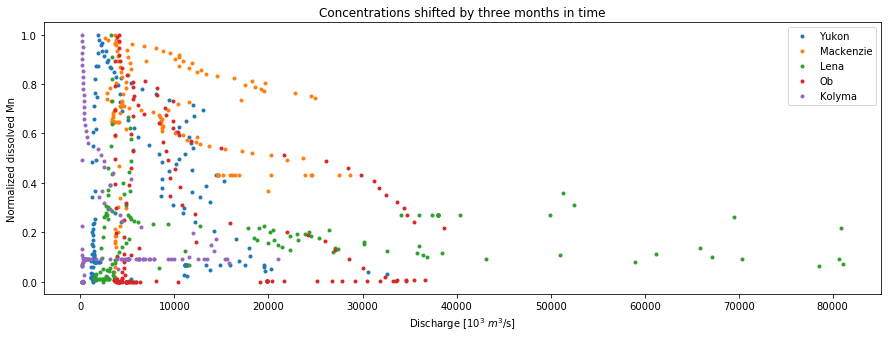

In [65]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1, 1), (0, 0)) 

shift = 15

ax1.plot(Q_yukon[0:156-shift], normalize(QMn_yukon[0+shift:156]), '.', label= 'Yukon')
ax1.plot(Q_mackenzie[0:156-shift], normalize(QMn_mackenzie[0+shift:156]), '.', label= 'Mackenzie')
ax1.plot(Q_lena[0:156-shift], normalize(QMn_lena[0+shift:156]), '.', label= 'Lena')
ax1.plot(Q_ob[0:156-shift], normalize(QMn_ob[0+shift:156]), '.', label= 'Ob')
ax1.plot(Q_kolyma[0:156-shift], normalize(QMn_kolyma[0+shift:156]), '.', label= 'Kolyma')
ax1.set_xlabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_ylabel('Normalized dissolved Mn')
ax1.set_title('Concentrations shifted by three months in time')
ax1.legend()

Would like to compare time delay of concentration increase with peak discharge for rivers that don't freeze in the winter. I suspect the early dissolved concentration increase corresponds to the stage at which ice becomes permeable. Then, when the ice melts, particulate concentrations increase and particulate material is also picked up from erosion.